In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

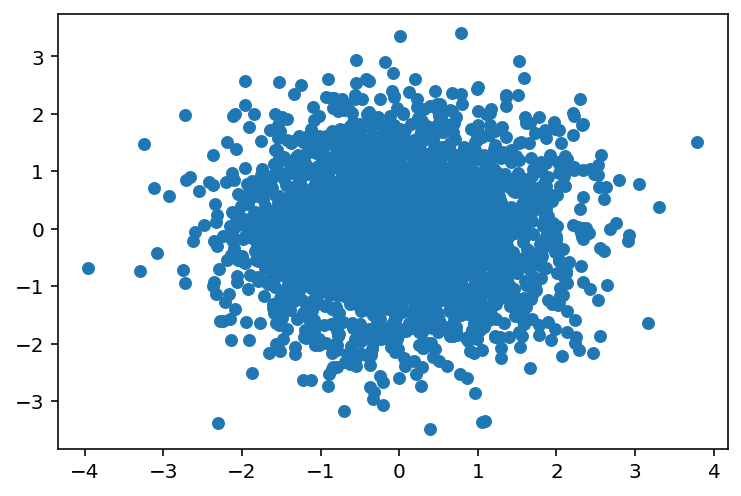

In [4]:
# Generate some data

X = np.random.randn(3000, 2)

# Plot the data

plt.scatter(X[:, 0], X[:, 1], s=30)

In [5]:
# Naive KNN

def naive_knn_for_loop(X, x_test, k=3):
    dists = np.zeros(X.shape[0])
    for i in range(X.shape[0]): # N iterations (N = number of data points)
        dists[i] = np.dot(X[i] - x_test, X[i] - x_test) # Time complexity: O(D)
    
    # Time complexity to create the distance array: O(N*D)

    # Now, we need to sort the distances
    # Time complexity: O(N*log(N))
    sorted_dists = np.argsort(dists)

    # Time complexity: O(k)
    return sorted_dists[:k]

In [6]:
%timeit naive_knn_for_loop(X, np.array([0, 0]))

12.7 ms ± 41.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
# Implement using numpy

def naive_knn_numpy(X, x_test, k=3):
    dists = np.sum((X - x_test)**2, axis=1)
    sorted_dists = np.argsort(dists)
    return sorted_dists[:k]


In [8]:
%timeit naive_knn_numpy(X, np.array([0, 0]))

242 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


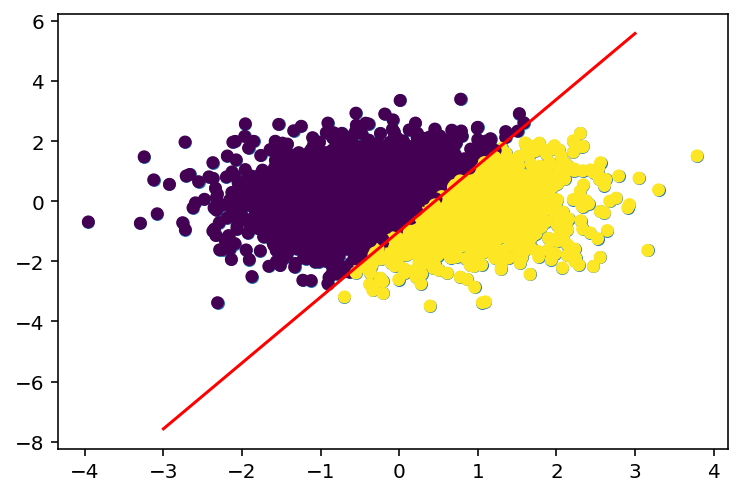

In [9]:
# Show LSH implementation step by step

# Creating a random separating hyperplane

w = np.random.randn(2)
b = np.random.randn(1)

# Plot the separating hyperplane

x = np.linspace(-3, 3, 100)
y = -(w[0] * x + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.plot(x, y, 'r')

# Color the points based on which side of the hyperplane they are on

colors = X[:, 0]*w[0] + X[:, 1]*w[1] + b > 0

plt.scatter(X[:, 0], X[:, 1], s=30, c=colors)

[-0.44543684 -2.02573568] [0.26697028]
[ 0.02870215 -1.02628883] [-0.01423546]
[-0.08089755  0.22046497] [0.07259317]


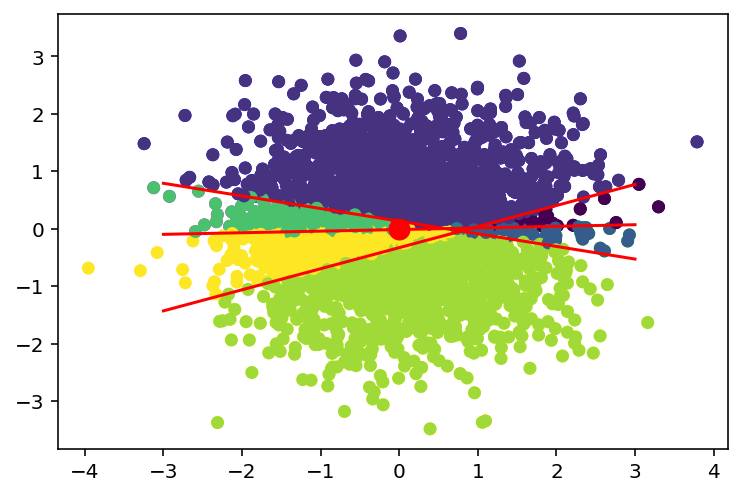

In [17]:
# Create three random hyperplanes and color the points based on which side of the hyperplane they are on. 
# there should be 2^3 = 8 different colors
# each separating hyperplane corresponds to a bit in the hash

hash = np.zeros((X.shape[0], 3)).astype(int)
ws = []
bs = []
for s_h in range(3):
    w = np.random.randn(2)
    b = np.random.randn(1)
    ws.append(w)
    bs.append(b)
    hash[:, s_h] = X[:, 0]*w[0] + X[:, 1]*w[1] + b > 0

# Convert the hash to a decimal number

hash_dec = np.sum(hash * 2**np.arange(3)[::-1], axis=1)

# Plot the hash

plt.scatter(X[:, 0], X[:, 1], s=30, c=hash)

# Plot the hash with the separating hyperplanes

plt.scatter(X[:, 0], X[:, 1], s=30, c=hash_dec)
for w, b in zip(ws, bs):
    print(w, b)
    x = np.linspace(-3, 3, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y, 'r')

# Mark the test point

x_test = np.array([0, 0])
plt.scatter(x_test[0], x_test[1], s=100, c='r')

In [18]:
pd.DataFrame(hash).head()

pd.DataFrame(hash).value_counts()

0  1  2
0  0  1    1273
1  1  0    1032
      1     408
   0  1     201
0  1  0      51
   0  0      33
   1  1       2
dtype: int64

In [19]:
# Predict the K nearest neighbors using LSH

# Compute the hash for the test point

x_test = np.array([0, 0])
hash_test = x_test[0]*ws[0][0] + x_test[1]*ws[0][1] + bs[0] > 0

#convert to decimal
hash_test_dec = np.sum(hash_test * 2**np.arange(3)[::-1])

hash_test_dec

7

In [20]:
# Find subset of points with the same hash

X_subset = X[hash_dec == hash_test_dec]
X_subset.shape

(408, 2)

In [21]:
# Now, we can use the naive KNN implementation to find the K nearest neighbors

naive_knn_numpy(X_subset, x_test, k=3)

array([396, 263,  92])

In [22]:
X_subset[naive_knn_numpy(X_subset, x_test, k=3)]

array([[-0.02365365, -0.05081177],
       [ 0.02026029, -0.05361056],
       [-0.03790977, -0.04458837]])